In [1]:
using Catalyst, DifferentialEquations, Plots, Serialization
include("ode_problem.jl")
include("calculate_experimental_outputs.jl");

### This Script Compares EGFR Simulations to the Reported Experimental Measurements
First, we define a ModelingToolkit.ODESystem. We can then use ModelingToolkit's Differential Equations package to numerically integrate the ODEs.
To generate predictions, we set the parameter values to the published values, and simulate the experimental conditions. Here, the conditions are stimulation of cells with various concentrations of EGF, and the downstream response of 4 different species, such as phosphorylated EGFR. Experimental data can be seen in Fig2 and Fig3 of Kholodenko. 

### Figure 2

In [3]:
solver_inputs = return_ode_problem_solver_default_inputs()
EGFR_response = []
EGFR_response_finegrain = []
my_species = "p_egfr"
for i in [20, 2, 0.2]
    odesys, u0, tspan, p = return_ode_problem_default_inputs(i)
    op = ODEProblem(odesys,[], tspan, [])
    op = remake(op, u0=u0)
    #simulate using DifferentialEquations solver and calculate fraction of activated G protein
    predicted = DifferentialEquations.solve(op, solver_inputs["solver"], abstol=solver_inputs["abstol"], reltol=solver_inputs["reltol"], saveat=solver_inputs["saveat"]);
    experimental_quantities = calculate_all_quantities(predicted)

    #fine grain simulation for visualization
    save_at = collect(range(start=0.0,stop=120.0, step=1))
    predicted = DifferentialEquations.solve(op, solver_inputs["solver"], abstol=solver_inputs["abstol"], reltol=solver_inputs["reltol"], saveat=save_at);
    experimental_quantities_finegrain = calculate_all_quantities(predicted)

    push!(EGFR_response, experimental_quantities[my_species])
    push!(EGFR_response_finegrain, experimental_quantities_finegrain[my_species])
end

┌ Warning: Cannot separate bidirectional kineticLaw `(-k21b*ShG(t)) / default_compartment + (k21f*ShP(t)*Grb(t)) / (default_compartment^2)` to forward and reverse part. Setting forward to `(-k21b*ShG(t)) / default_compartment + (k21f*ShP(t)*Grb(t)) / (default_compartment^2)` and reverse to `0`. Stochastic simulations will be inexact.
└ @ SBMLToolkit ~/.julia/packages/SBMLToolkit/7C24E/src/reactions.jl:35
┌ Warning: Cannot separate bidirectional kineticLaw `(V4*RP(t)) / ((K4 + RP(t) / default_compartment)*default_compartment)` to forward and reverse part. Setting forward to `(V4*RP(t)) / ((K4 + RP(t) / default_compartment)*default_compartment)` and reverse to `0`. Stochastic simulations will be inexact.
└ @ SBMLToolkit ~/.julia/packages/SBMLToolkit/7C24E/src/reactions.jl:35
┌ Warning: Cannot separate bidirectional kineticLaw `(k20f*RShGS(t)) / default_compartment + (-k20b*RP(t)*ShGS(t)) / (default_compartment^2)` to forward and reverse part. Setting forward to `(k20f*RShGS(t)) / default

In [6]:
save_at = collect(range(start=0.0,stop=120.0, step=1))
egf_concentrations = [20,2,0.2]
mark_shapes = [:circle,:utriangle,:rect]
data = ["p_egfr_20", "p_egfr_2", "p_egfr_02"]
plot(save_at, EGFR_response_finegrain[1], label=false, color="darkturquoise")
for i in 1:3
    experiment_timecourse = deserialize("outputs/000_processed_$(data[i]).dict")
    plot!(save_at, EGFR_response_finegrain[i], label=false, color="darkturquoise")
    scatter!(experiment_timecourse["save_at"], EGFR_response[i], label="simulated, $(egf_concentrations[i])nM", color="darkturquoise",
    marker=mark_shapes[i])
    scatter!(experiment_timecourse["save_at"], experiment_timecourse["response"], label="experimental data, $(egf_concentrations[i])nM", color="black",
    yerr=experiment_timecourse["average_error"],marker=mark_shapes[i])
end
xlabel!("Time (secs)")
ylabel!("Percent pEGFR")
title!("Figure 2 of Kholodenko et al")
ylims!(0,80)
savefig("outputs/001_kholodenko_fig2.png")

"/Users/hollyhuber/Documents/ml_informed_binding_affinity/kholodenko_egfr_model/outputs/001_kholodenko_fig2.png"

### Figure 3A

┌ Warning: Cannot separate bidirectional kineticLaw `(-k21b*ShG(t)) / default_compartment + (k21f*ShP(t)*Grb(t)) / (default_compartment^2)` to forward and reverse part. Setting forward to `(-k21b*ShG(t)) / default_compartment + (k21f*ShP(t)*Grb(t)) / (default_compartment^2)` and reverse to `0`. Stochastic simulations will be inexact.
└ @ SBMLToolkit ~/.julia/packages/SBMLToolkit/7C24E/src/reactions.jl:35
┌ Warning: Cannot separate bidirectional kineticLaw `(V4*RP(t)) / ((K4 + RP(t) / default_compartment)*default_compartment)` to forward and reverse part. Setting forward to `(V4*RP(t)) / ((K4 + RP(t) / default_compartment)*default_compartment)` and reverse to `0`. Stochastic simulations will be inexact.
└ @ SBMLToolkit ~/.julia/packages/SBMLToolkit/7C24E/src/reactions.jl:35
┌ Warning: Cannot separate bidirectional kineticLaw `(k20f*RShGS(t)) / default_compartment + (-k20b*RP(t)*ShGS(t)) / (default_compartment^2)` to forward and reverse part. Setting forward to `(k20f*RShGS(t)) / default

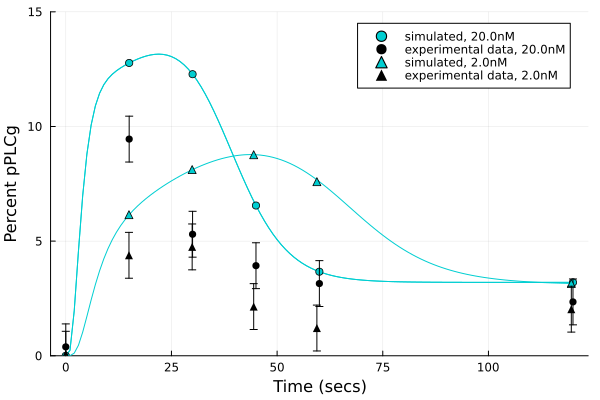

In [12]:
solver_inputs = return_ode_problem_solver_default_inputs()
simulated_response = []
simulated_response_finegrain = []
my_species = "p_plcg"
for i in [20, 2]
    odesys, u0, tspan, p = return_ode_problem_default_inputs(i)
    op = ODEProblem(odesys,[], tspan, [])
    op = remake(op, u0=u0)
    #simulate using DifferentialEquations solver and calculate fraction of activated G protein
    predicted = DifferentialEquations.solve(op, solver_inputs["solver"], abstol=solver_inputs["abstol"], reltol=solver_inputs["reltol"], saveat=solver_inputs["saveat"]);
    experimental_quantities = calculate_all_quantities(predicted)

    #fine grain simulation for visualization
    save_at = collect(range(start=0.0,stop=120.0, step=1))
    predicted = DifferentialEquations.solve(op, solver_inputs["solver"], abstol=solver_inputs["abstol"], reltol=solver_inputs["reltol"], saveat=save_at);
    experimental_quantities_finegrain = calculate_all_quantities(predicted)

    push!(simulated_response, experimental_quantities[my_species])
    push!(simulated_response_finegrain, experimental_quantities_finegrain[my_species])
end

save_at = collect(range(start=0.0,stop=120.0, step=1))
initial_concentrations = [20,2,0.2]
mark_shapes = [:circle,:utriangle,:rect]
data = ["p_plcg_20", "p_plcg_2"]
p1 = plot(save_at, simulated_response_finegrain[1], label=false, color="darkturquoise")
for i in 1:2
    experiment_timecourse = deserialize("outputs/000_processed_$(data[i]).dict")
    plot!(save_at, simulated_response_finegrain[i], label=false, color="darkturquoise")
    scatter!(experiment_timecourse["save_at"], simulated_response[i], label="simulated, $(initial_concentrations[i])nM", color="darkturquoise",
    marker=mark_shapes[i])
    scatter!(experiment_timecourse["save_at"], experiment_timecourse["response"], label="experimental data, $(initial_concentrations[i])nM", color="black",
    yerr=experiment_timecourse["average_error"],marker=mark_shapes[i])
end
xlabel!("Time (secs)")
ylabel!("Percent pPLCg")
#title!("Figure 3 of Kholodenko et al")
ylims!(0,15)
#savefig("outputs/001_kholodenko_fig2.png")

### Figure 3B

┌ Warning: Cannot separate bidirectional kineticLaw `(-k21b*ShG(t)) / default_compartment + (k21f*ShP(t)*Grb(t)) / (default_compartment^2)` to forward and reverse part. Setting forward to `(-k21b*ShG(t)) / default_compartment + (k21f*ShP(t)*Grb(t)) / (default_compartment^2)` and reverse to `0`. Stochastic simulations will be inexact.
└ @ SBMLToolkit ~/.julia/packages/SBMLToolkit/7C24E/src/reactions.jl:35
┌ Warning: Cannot separate bidirectional kineticLaw `(V4*RP(t)) / ((K4 + RP(t) / default_compartment)*default_compartment)` to forward and reverse part. Setting forward to `(V4*RP(t)) / ((K4 + RP(t) / default_compartment)*default_compartment)` and reverse to `0`. Stochastic simulations will be inexact.
└ @ SBMLToolkit ~/.julia/packages/SBMLToolkit/7C24E/src/reactions.jl:35
┌ Warning: Cannot separate bidirectional kineticLaw `(k20f*RShGS(t)) / default_compartment + (-k20b*RP(t)*ShGS(t)) / (default_compartment^2)` to forward and reverse part. Setting forward to `(k20f*RShGS(t)) / default

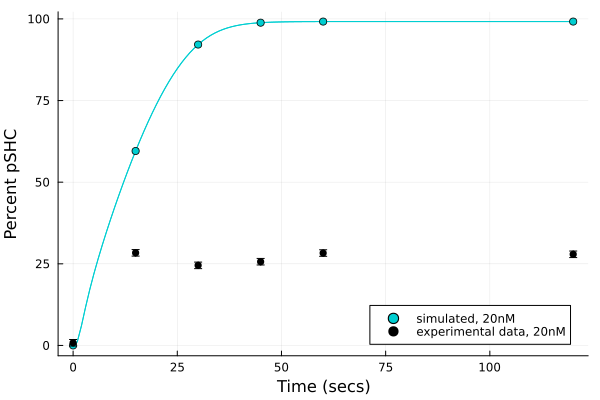

In [13]:
solver_inputs = return_ode_problem_solver_default_inputs()
simulated_response = []
simulated_response_finegrain = []
my_species = "p_shc"
for i in [20]
    odesys, u0, tspan, p = return_ode_problem_default_inputs(i)
    op = ODEProblem(odesys,[], tspan, [])
    op = remake(op, u0=u0)
    #simulate using DifferentialEquations solver and calculate fraction of activated G protein
    predicted = DifferentialEquations.solve(op, solver_inputs["solver"], abstol=solver_inputs["abstol"], reltol=solver_inputs["reltol"], saveat=solver_inputs["saveat"]);
    experimental_quantities = calculate_all_quantities(predicted)

    #fine grain simulation for visualization
    save_at = collect(range(start=0.0,stop=120.0, step=1))
    predicted = DifferentialEquations.solve(op, solver_inputs["solver"], abstol=solver_inputs["abstol"], reltol=solver_inputs["reltol"], saveat=save_at);
    experimental_quantities_finegrain = calculate_all_quantities(predicted)

    push!(simulated_response, experimental_quantities[my_species])
    push!(simulated_response_finegrain, experimental_quantities_finegrain[my_species])
end

save_at = collect(range(start=0.0,stop=120.0, step=1))
initial_concentrations = [20]
mark_shapes = [:circle,:utriangle,:rect]
data = ["p_shc_20"]
p2 = plot(save_at, simulated_response_finegrain[1], label=false, color="darkturquoise")
for i in 1:1
    experiment_timecourse = deserialize("outputs/000_processed_$(data[i]).dict")
    plot!(save_at, simulated_response_finegrain[i], label=false, color="darkturquoise")
    scatter!(experiment_timecourse["save_at"], simulated_response[i], label="simulated, $(initial_concentrations[i])nM", color="darkturquoise",
    marker=mark_shapes[i])
    scatter!(experiment_timecourse["save_at"], experiment_timecourse["response"], label="experimental data, $(initial_concentrations[i])nM", color="black",
    yerr=experiment_timecourse["average_error"],marker=mark_shapes[i])
end
xlabel!("Time (secs)")
ylabel!("Percent pSHC")
#title!("Figure 3 of Kholodenko et al")
#ylims!(0,45)
#savefig("outputs/001_kholodenko_fig2.png")

### Figure 3C

┌ Warning: Cannot separate bidirectional kineticLaw `(-k21b*ShG(t)) / default_compartment + (k21f*ShP(t)*Grb(t)) / (default_compartment^2)` to forward and reverse part. Setting forward to `(-k21b*ShG(t)) / default_compartment + (k21f*ShP(t)*Grb(t)) / (default_compartment^2)` and reverse to `0`. Stochastic simulations will be inexact.
└ @ SBMLToolkit ~/.julia/packages/SBMLToolkit/7C24E/src/reactions.jl:35
┌ Warning: Cannot separate bidirectional kineticLaw `(V4*RP(t)) / ((K4 + RP(t) / default_compartment)*default_compartment)` to forward and reverse part. Setting forward to `(V4*RP(t)) / ((K4 + RP(t) / default_compartment)*default_compartment)` and reverse to `0`. Stochastic simulations will be inexact.
└ @ SBMLToolkit ~/.julia/packages/SBMLToolkit/7C24E/src/reactions.jl:35
┌ Warning: Cannot separate bidirectional kineticLaw `(k20f*RShGS(t)) / default_compartment + (-k20b*RP(t)*ShGS(t)) / (default_compartment^2)` to forward and reverse part. Setting forward to `(k20f*RShGS(t)) / default

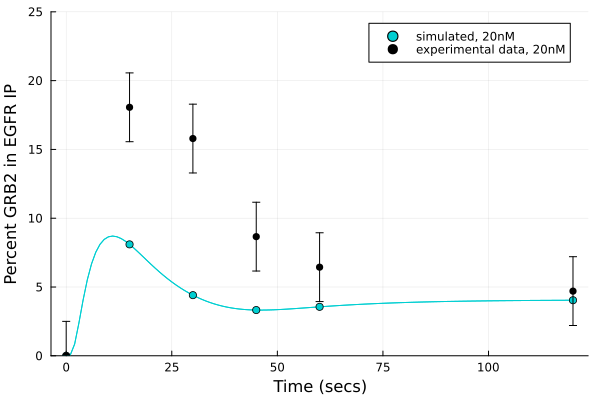

In [14]:
solver_inputs = return_ode_problem_solver_default_inputs()
simulated_response = []
simulated_response_finegrain = []
my_species = "grb2_egfr"
for i in [20]
    odesys, u0, tspan, p = return_ode_problem_default_inputs(i)
    op = ODEProblem(odesys,[], tspan, [])
    op = remake(op, u0=u0)
    #simulate using DifferentialEquations solver and calculate fraction of activated G protein
    predicted = DifferentialEquations.solve(op, solver_inputs["solver"], abstol=solver_inputs["abstol"], reltol=solver_inputs["reltol"], saveat=solver_inputs["saveat"]);
    experimental_quantities = calculate_all_quantities(predicted)

    #fine grain simulation for visualization
    save_at = collect(range(start=0.0,stop=120.0, step=1))
    predicted = DifferentialEquations.solve(op, solver_inputs["solver"], abstol=solver_inputs["abstol"], reltol=solver_inputs["reltol"], saveat=save_at);
    experimental_quantities_finegrain = calculate_all_quantities(predicted)

    push!(simulated_response, experimental_quantities[my_species])
    push!(simulated_response_finegrain, experimental_quantities_finegrain[my_species])
end

save_at = collect(range(start=0.0,stop=120.0, step=1))
initial_concentrations = [20]
mark_shapes = [:circle,:utriangle,:rect]
data = ["grb_egfr_20"]
p3 = plot(save_at, simulated_response_finegrain[1], label=false, color="darkturquoise")
for i in 1:1
    experiment_timecourse = deserialize("outputs/000_processed_$(data[i]).dict")
    plot!(save_at, simulated_response_finegrain[i], label=false, color="darkturquoise")
    scatter!(experiment_timecourse["save_at"], simulated_response[i], label="simulated, $(initial_concentrations[i])nM", color="darkturquoise",
    marker=mark_shapes[i])
    scatter!(experiment_timecourse["save_at"], experiment_timecourse["response"], label="experimental data, $(initial_concentrations[i])nM", color="black",
    yerr=experiment_timecourse["average_error"],marker=mark_shapes[i])
end
xlabel!("Time (secs)")
ylabel!("Percent GRB2 in EGFR IP")
#title!("Figure 3 of Kholodenko et al")
ylims!(0,25)
#savefig("outputs/001_kholodenko_fig2.png")

┌ Warning: Cannot separate bidirectional kineticLaw `(-k21b*ShG(t)) / default_compartment + (k21f*ShP(t)*Grb(t)) / (default_compartment^2)` to forward and reverse part. Setting forward to `(-k21b*ShG(t)) / default_compartment + (k21f*ShP(t)*Grb(t)) / (default_compartment^2)` and reverse to `0`. Stochastic simulations will be inexact.
└ @ SBMLToolkit ~/.julia/packages/SBMLToolkit/7C24E/src/reactions.jl:35
┌ Warning: Cannot separate bidirectional kineticLaw `(V4*RP(t)) / ((K4 + RP(t) / default_compartment)*default_compartment)` to forward and reverse part. Setting forward to `(V4*RP(t)) / ((K4 + RP(t) / default_compartment)*default_compartment)` and reverse to `0`. Stochastic simulations will be inexact.
└ @ SBMLToolkit ~/.julia/packages/SBMLToolkit/7C24E/src/reactions.jl:35
┌ Warning: Cannot separate bidirectional kineticLaw `(k20f*RShGS(t)) / default_compartment + (-k20b*RP(t)*ShGS(t)) / (default_compartment^2)` to forward and reverse part. Setting forward to `(k20f*RShGS(t)) / default

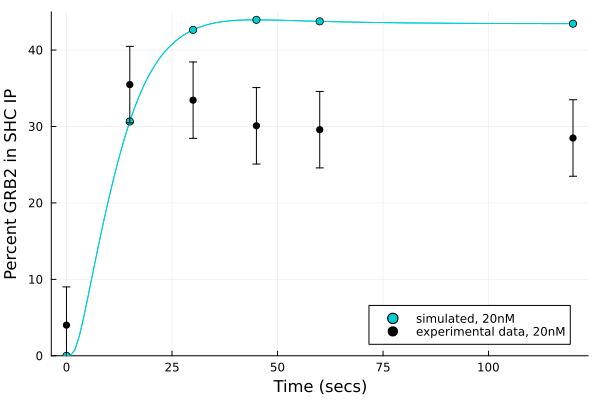

In [15]:
solver_inputs = return_ode_problem_solver_default_inputs()
simulated_response = []
simulated_response_finegrain = []
my_species = "grb2_shc"
for i in [20]
    odesys, u0, tspan, p = return_ode_problem_default_inputs(i)
    op = ODEProblem(odesys,[], tspan, [])
    op = remake(op, u0=u0)
    #simulate using DifferentialEquations solver and calculate fraction of activated G protein
    predicted = DifferentialEquations.solve(op, solver_inputs["solver"], abstol=solver_inputs["abstol"], reltol=solver_inputs["reltol"], saveat=solver_inputs["saveat"]);
    experimental_quantities = calculate_all_quantities(predicted)

    #fine grain simulation for visualization
    save_at = collect(range(start=0.0,stop=120.0, step=1))
    predicted = DifferentialEquations.solve(op, solver_inputs["solver"], abstol=solver_inputs["abstol"], reltol=solver_inputs["reltol"], saveat=save_at);
    experimental_quantities_finegrain = calculate_all_quantities(predicted)

    push!(simulated_response, experimental_quantities[my_species])
    push!(simulated_response_finegrain, experimental_quantities_finegrain[my_species])
end

save_at = collect(range(start=0.0,stop=120.0, step=1))
initial_concentrations = [20]
mark_shapes = [:circle,:utriangle,:rect]
data = ["grb_shc_20"]
p4 = plot(save_at, simulated_response_finegrain[1], label=false, color="darkturquoise")
for i in 1:1
    experiment_timecourse = deserialize("outputs/000_processed_$(data[i]).dict")
    plot!(save_at, simulated_response_finegrain[i], label=false, color="darkturquoise")
    scatter!(experiment_timecourse["save_at"], simulated_response[i], label="simulated, $(initial_concentrations[i])nM", color="darkturquoise",
    marker=mark_shapes[i])
    scatter!(experiment_timecourse["save_at"], experiment_timecourse["response"], label="experimental data, $(initial_concentrations[i])nM", color="black",
    yerr=experiment_timecourse["average_error"],marker=mark_shapes[i])
end
xlabel!("Time (secs)")
ylabel!("Percent GRB2 in SHC IP")
#title!("Figure 3 of Kholodenko et al")
ylims!(0,45)
#savefig("outputs/001_kholodenko_fig2.png")

In [18]:
plot(p1,p2,p3,p4,layout=(2,2),dpi=200,size=(1000,500),xguidefontsize=8, yguidefontsize=8,xtickfontsize=5,ytickfontsize=5,titlefontsize=12, 
left_margin=[3Plots.mm 1Plots.mm])
savefig("outputs/001_kholodenko_fig3.png")

"/Users/hollyhuber/Documents/ml_informed_binding_affinity/kholodenko_egfr_model/outputs/001_kholodenko_fig3.png"